In [1]:
from datascience import *
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Classification

In [2]:
banknotes = Table.read_table('banknote.csv')
banknotes

WaveletVar | WaveletSkew | WaveletCurt | Entropy  | Class
3.6216     | 8.6661      | -2.8073     | -0.44699 | 0
4.5459     | 8.1674      | -2.4586     | -1.4621  | 0
3.866      | -2.6383     | 1.9242      | 0.10645  | 0
3.4566     | 9.5228      | -4.0112     | -3.5944  | 0
0.32924    | -4.4552     | 4.5718      | -0.9888  | 0
4.3684     | 9.6718      | -3.9606     | -3.1625  | 0
3.5912     | 3.0129      | 0.72888     | 0.56421  | 0
2.0922     | -6.81       | 8.4636      | -0.60216 | 0
3.2032     | 5.7588      | -0.75345    | -0.61251 | 0
1.5356     | 9.1772      | -2.2718     | -0.73535 | 0
... (1362 rows omitted)

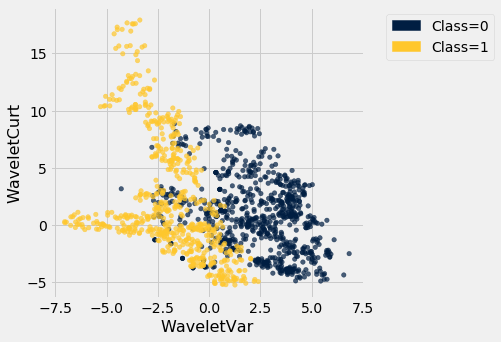

In [3]:
banknotes.scatter('WaveletVar', 'WaveletCurt', colors='Class')

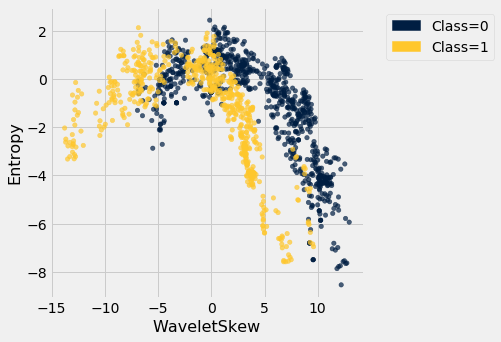

In [4]:
banknotes.scatter('WaveletSkew', 'Entropy', colors='Class')

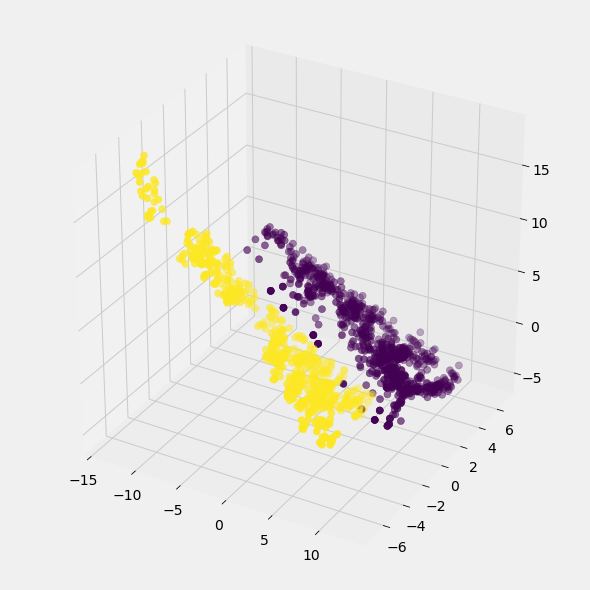

In [5]:
fig = plots.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(banknotes.column('WaveletSkew'), 
           banknotes.column('WaveletVar'), 
           banknotes.column('WaveletCurt'), 
           c=banknotes.column('Class'),
           cmap='viridis',
          s=50);

In [6]:
for i in np.arange(banknotes.num_columns):
    values = banknotes.column(i)
    print('"%s": std=%f' % (banknotes.labels[i], np.std(values)))


"WaveletVar": std=2.841726
"WaveletSkew": std=5.866907
"WaveletCurt": std=4.308459
"Entropy": std=2.100247
"Class": std=0.496922


#### Breast cancer classifier

In [7]:
#Class 1 = malignant (cancer)
#Class 0 = benign (not cancer)
patients = Table.read_table('breast-cancer.csv').drop('ID')
patients

Clump Thickness | Uniformity of Cell Size | Uniformity of Cell Shape | Marginal Adhesion | Single Epithelial Cell Size | Bare Nuclei | Bland Chromatin | Normal Nucleoli | Mitoses | Class
5               | 1                       | 1                        | 1                 | 2                           | 1           | 3               | 1               | 1       | 0
5               | 4                       | 4                        | 5                 | 7                           | 10          | 3               | 2               | 1       | 0
3               | 1                       | 1                        | 1                 | 2                           | 2           | 3               | 1               | 1       | 0
6               | 8                       | 8                        | 1                 | 3                           | 4           | 3               | 7               | 1       | 0
4               | 1                       | 1                        | 3                 | 2                           | 1           | 3               | 1               | 1       | 0
8               | 10                      | 10                       | 8                 | 7                           | 10          | 9               | 7               | 1       | 1
1               | 1                       | 1                        | 1                 | 2                           | 10          | 3               | 1               | 1       | 0
2               | 1                       | 2                        | 1                 | 2                           | 1           | 3               | 1               | 1       | 0
2               | 1                       | 1                        | 1                 | 2                           | 1           | 1               | 1               | 5       | 0
4               | 2                       | 1                        | 1                 | 2                           | 1           | 2               | 1               | 1       | 0
... (673 rows omitted)

In [8]:
for i in np.arange(patients.num_columns):
    values = patients.column(i)
    print('"%s": std=%f' % (patients.labels[i], np.std(values)))


"Clump Thickness": std=2.818696
"Uniformity of Cell Size": std=3.062900
"Uniformity of Cell Shape": std=2.986392
"Marginal Adhesion": std=2.862464
"Single Epithelial Cell Size": std=2.221457
"Bare Nuclei": std=3.641189
"Bland Chromatin": std=2.447903
"Normal Nucleoli": std=3.050431
"Mitoses": std=1.731405
"Class": std=0.476947


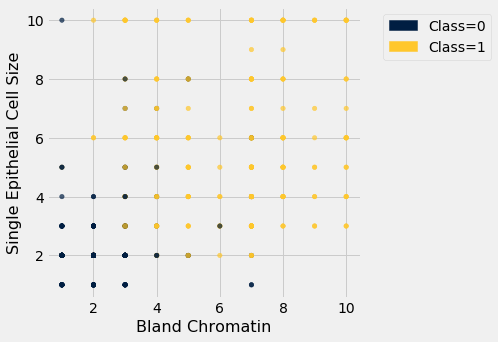

In [9]:
#A number of points are layered
patients.scatter('Bland Chromatin', 'Single Epithelial Cell Size', colors='Class')

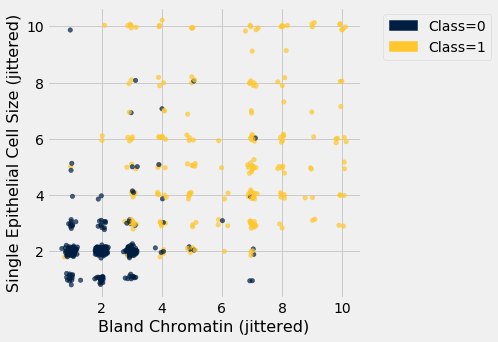

In [10]:
#Function to "jitter" the points (for visualization purposes)
def randomize_column(a):
    return a + np.random.normal(0.0, 0.09, size=len(a))

jittered = Table().with_columns([
        'Bland Chromatin (jittered)', 
        randomize_column(patients.column('Bland Chromatin')),
        'Single Epithelial Cell Size (jittered)', 
        randomize_column(patients.column('Single Epithelial Cell Size')),
        'Class',
        patients.column('Class')
    ])

jittered.scatter(0, 1, colors='Class')

## Distance ##

In [11]:
def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

def row_distance(row1, row2):
    """Return the distance between two numerical rows of a table"""
    return distance(np.array(row1), np.array(row2))

In [12]:
attributes = patients.drop('Class')
attributes

Clump Thickness | Uniformity of Cell Size | Uniformity of Cell Shape | Marginal Adhesion | Single Epithelial Cell Size | Bare Nuclei | Bland Chromatin | Normal Nucleoli | Mitoses
5               | 1                       | 1                        | 1                 | 2                           | 1           | 3               | 1               | 1
5               | 4                       | 4                        | 5                 | 7                           | 10          | 3               | 2               | 1
3               | 1                       | 1                        | 1                 | 2                           | 2           | 3               | 1               | 1
6               | 8                       | 8                        | 1                 | 3                           | 4           | 3               | 7               | 1
4               | 1                       | 1                        | 3                 | 2                           | 1           | 3               | 1               | 1
8               | 10                      | 10                       | 8                 | 7                           | 10          | 9               | 7               | 1
1               | 1                       | 1                        | 1                 | 2                           | 10          | 3               | 1               | 1
2               | 1                       | 2                        | 1                 | 2                           | 1           | 3               | 1               | 1
2               | 1                       | 1                        | 1                 | 2                           | 1           | 1               | 1               | 5
4               | 2                       | 1                        | 1                 | 2                           | 1           | 2               | 1               | 1
... (673 rows omitted)

In [13]:
#pull values from a row
np.array(attributes.row(1))

array([ 5,  4,  4,  5,  7, 10,  3,  2,  1])

In [14]:
row_distance(attributes.row(0), attributes.row(1))

11.874342087037917

In [15]:
row_distance(attributes.row(0), attributes.row(0))

0.0

## Classification Procedure ##

In [16]:
def distances(training, example):
    """Compute distance between example and every row in training.
    Return training augmented with Distance column"""
    distances = make_array()
    attributes = training.drop('Class')
    for row in attributes.rows:
        distances = np.append(distances, row_distance(row, example))
    return training.with_column('Distance', distances)

In [17]:
patients.take(15)

Clump Thickness | Uniformity of Cell Size | Uniformity of Cell Shape | Marginal Adhesion | Single Epithelial Cell Size | Bare Nuclei | Bland Chromatin | Normal Nucleoli | Mitoses | Class
7               | 4                       | 6                        | 4                 | 6                           | 1           | 4               | 3               | 1       | 1

In [18]:
example = attributes.row(15)
example

Row(Clump Thickness=7, Uniformity of Cell Size=4, Uniformity of Cell Shape=6, Marginal Adhesion=4, Single Epithelial Cell Size=6, Bare Nuclei=1, Bland Chromatin=4, Normal Nucleoli=3, Mitoses=1)

In [19]:
distances(patients.exclude(15), example).sort('Distance')

Clump Thickness | Uniformity of Cell Size | Uniformity of Cell Shape | Marginal Adhesion | Single Epithelial Cell Size | Bare Nuclei | Bland Chromatin | Normal Nucleoli | Mitoses | Class | Distance
8               | 4                       | 6                        | 3                 | 3                           | 1           | 4               | 3               | 1       | 0     | 3.31662
5               | 3                       | 4                        | 1                 | 4                           | 1           | 3               | 1               | 1       | 0     | 5.19615
5               | 4                       | 5                        | 1                 | 8                           | 1           | 3               | 6               | 1       | 0     | 5.2915
8               | 2                       | 4                        | 1                 | 5                           | 1           | 5               | 4               | 4       | 1     | 5.47723
9               | 5                       | 5                        | 4                 | 4                           | 5           | 4               | 3               | 3       | 1     | 5.47723
6               | 3                       | 3                        | 3                 | 3                           | 2           | 6               | 1               | 1       | 0     | 5.47723
9               | 5                       | 5                        | 2                 | 2                           | 2           | 5               | 1               | 1       | 1     | 5.65685
3               | 4                       | 5                        | 3                 | 7                           | 3           | 4               | 6               | 1       | 0     | 5.65685
5               | 3                       | 3                        | 2                 | 3                           | 1           | 3               | 1               | 1       | 0     | 5.65685
5               | 6                       | 5                        | 6                 | 10                          | 1           | 3               | 1               | 1       | 1     | 5.83095
... (672 rows omitted)

In [20]:
###########################################################
def closest(training, example, k):
    """Return a table of the k closest neighbors to example"""
    return distances(training, example).sort('Distance').take(np.arange(k))

In [37]:
closest(patients.exclude(15), example, 5)

Clump Thickness | Uniformity of Cell Size | Uniformity of Cell Shape | Marginal Adhesion | Single Epithelial Cell Size | Bare Nuclei | Bland Chromatin | Normal Nucleoli | Mitoses | Class | Distance
8               | 4                       | 6                        | 3                 | 3                           | 1           | 4               | 3               | 1       | 0     | 3.31662
5               | 3                       | 4                        | 1                 | 4                           | 1           | 3               | 1               | 1       | 0     | 5.19615
5               | 4                       | 5                        | 1                 | 8                           | 1           | 3               | 6               | 1       | 0     | 5.2915
8               | 2                       | 4                        | 1                 | 5                           | 1           | 5               | 4               | 4       | 1     | 5.47723
9               | 5                       | 5                        | 4                 | 4                           | 5           | 4               | 3               | 3       | 1     | 5.47723

In [23]:
def majority_class(topk):
    """Return the class with the highest count"""
    return topk.group('Class').sort('count', descending=True).column(0).item(0)

def classify(training, example, k):
    "Return the majority class among the k nearest neighbors of example"
    return majority_class(closest(training, example, k))

In [35]:
patients.take(15)

Clump Thickness | Uniformity of Cell Size | Uniformity of Cell Shape | Marginal Adhesion | Single Epithelial Cell Size | Bare Nuclei | Bland Chromatin | Normal Nucleoli | Mitoses | Class
7               | 4                       | 6                        | 4                 | 6                           | 1           | 4               | 3               | 1       | 1

In [39]:
example = attributes.row(15)
classify(patients.exclude(15), example, 5)

0

In [40]:
patients.take(15)

Clump Thickness | Uniformity of Cell Size | Uniformity of Cell Shape | Marginal Adhesion | Single Epithelial Cell Size | Bare Nuclei | Bland Chromatin | Normal Nucleoli | Mitoses | Class
7               | 4                       | 6                        | 4                 | 6                           | 1           | 4               | 3               | 1       | 1

In [49]:
new_example = attributes.row(10)
print(patients.row(10))
closest(patients.exclude(10), new_example, 5)
#classify(patients.exclude(10), new_example, 5)

Row(Clump Thickness=1, Uniformity of Cell Size=1, Uniformity of Cell Shape=1, Marginal Adhesion=1, Single Epithelial Cell Size=1, Bare Nuclei=1, Bland Chromatin=3, Normal Nucleoli=1, Mitoses=1, Class=0)


Clump Thickness | Uniformity of Cell Size | Uniformity of Cell Shape | Marginal Adhesion | Single Epithelial Cell Size | Bare Nuclei | Bland Chromatin | Normal Nucleoli | Mitoses | Class | Distance
1               | 1                       | 1                        | 1                 | 1                           | 1           | 3               | 1               | 1       | 0     | 0
1               | 1                       | 1                        | 1                 | 1                           | 1           | 3               | 1               | 1       | 0     | 0
1               | 1                       | 1                        | 1                 | 1                           | 1           | 3               | 1               | 1       | 0     | 0
1               | 1                       | 1                        | 1                 | 1                           | 1           | 3               | 1               | 1       | 0     | 0
1               | 1                       | 1                        | 1                 | 1                           | 1           | 3               | 1               | 1       | 0     | 0

In [78]:
patients.take(10)

Clump Thickness | Uniformity of Cell Size | Uniformity of Cell Shape | Marginal Adhesion | Single Epithelial Cell Size | Bare Nuclei | Bland Chromatin | Normal Nucleoli | Mitoses | Class
1               | 1                       | 1                        | 1                 | 1                           | 1           | 3               | 1               | 1       | 0

## Evaluation ##

In [50]:
data = Table.read_table('breast-cancer.csv').drop('ID')
#data = banknotes
#data = data.drop('WaveletSkew').drop('Entropy')
data

Clump Thickness | Uniformity of Cell Size | Uniformity of Cell Shape | Marginal Adhesion | Single Epithelial Cell Size | Bare Nuclei | Bland Chromatin | Normal Nucleoli | Mitoses | Class
5               | 1                       | 1                        | 1                 | 2                           | 1           | 3               | 1               | 1       | 0
5               | 4                       | 4                        | 5                 | 7                           | 10          | 3               | 2               | 1       | 0
3               | 1                       | 1                        | 1                 | 2                           | 2           | 3               | 1               | 1       | 0
6               | 8                       | 8                        | 1                 | 3                           | 4           | 3               | 7               | 1       | 0
4               | 1                       | 1                        | 3                 | 2                           | 1           | 3               | 1               | 1       | 0
8               | 10                      | 10                       | 8                 | 7                           | 10          | 9               | 7               | 1       | 1
1               | 1                       | 1                        | 1                 | 2                           | 10          | 3               | 1               | 1       | 0
2               | 1                       | 2                        | 1                 | 2                           | 1           | 3               | 1               | 1       | 0
2               | 1                       | 1                        | 1                 | 2                           | 1           | 1               | 1               | 5       | 0
4               | 2                       | 1                        | 1                 | 2                           | 1           | 2               | 1               | 1       | 0
... (673 rows omitted)

In [54]:
shuffled = data.sample(with_replacement=False) # Randomly permute the rows
n_total = shuffled.num_rows
n_train = 342
training_set = shuffled.take(np.arange(n_train))
test_set  = shuffled.take(np.arange(n_train, n_total))


In [55]:
print(training_set.num_rows)
print(test_set.num_rows)
training_set.group('Class')

342
341


Class | count
0     | 223
1     | 119

In [56]:
def evaluate_accuracy(training, test, k):
    """Return the proportion of correctly classified examples 
    in the test set"""
    test_attributes = test.drop('Class')
    num_correct = 0
    for i in np.arange(test.num_rows):
        c = classify(training, test_attributes.row(i), k)
        num_correct = num_correct + (c == test.column('Class').item(i))
    return num_correct / test.num_rows

In [57]:
evaluate_accuracy(training_set, test_set, 5)

0.9765395894428153

In [58]:
evaluate_accuracy(training_set, test_set, 3)

0.9736070381231672

In [59]:
evaluate_accuracy(training_set, test_set, 11)

0.9736070381231672

In [112]:
evaluate_accuracy(training_set, training_set, 1)

1.0

In [113]:
evaluate_accuracy(training_set, test_set, 1)

0.9588336192109777

In [60]:
accuracies = make_array()
ks = np.arange(1,15,2)
for k in ks:
    accuracy = 100*evaluate_accuracy(training_set, test_set, k)
    accuracies = np.append(accuracies, accuracy)
    print('k=%d, accuracy=%.2f%%' % (k, accuracy))
    

k=1, accuracy=96.77%
k=3, accuracy=97.36%
k=5, accuracy=97.65%
k=7, accuracy=97.07%
k=9, accuracy=97.36%
k=11, accuracy=97.36%
k=13, accuracy=97.36%


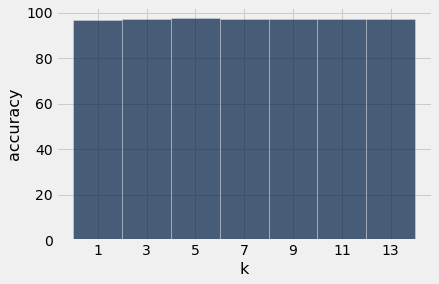

In [62]:
t = Table().with_columns('k', ks, 'accuracy', accuracies)
t.bar('k')


In [22]:
banknotes = Table.read_table('banknote.csv')
banknotes = banknotes.drop('WaveletVar').drop('WaveletSkew')
banknotes

WaveletCurt | Entropy  | Class
-2.8073     | -0.44699 | 0
-2.4586     | -1.4621  | 0
1.9242      | 0.10645  | 0
-4.0112     | -3.5944  | 0
4.5718      | -0.9888  | 0
-3.9606     | -3.1625  | 0
0.72888     | 0.56421  | 0
8.4636      | -0.60216 | 0
-0.75345    | -0.61251 | 0
-2.2718     | -0.73535 | 0
... (1362 rows omitted)